In [119]:
import pandas as pd
from pandas import read_excel

file = '/home/senior/Downloads/Real estate valuation data set.xlsx'
my_sheet = 'Sheet1' 
file_name = '/home/senior/Downloads/Real estate valuation data set.xlsx' # change it to the name of your excel file
df_orig = read_excel(file_name, sheet_name = my_sheet)

df_orig.head(10)


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1


<ipython-input-120-a4e6a4f52b2e>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


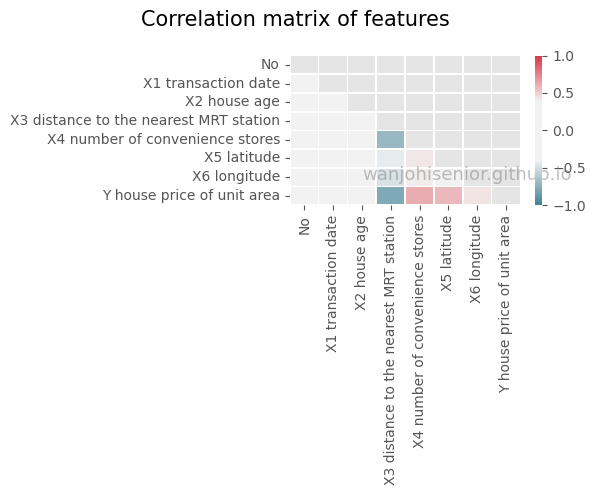

In [120]:
import seaborn as sns

df = df_orig.copy()
corr = df_orig.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

fig.suptitle('Correlation matrix of features', fontsize=15)
ax.text(0.77, 0.2, 'wanjohisenior.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)

fig.tight_layout()

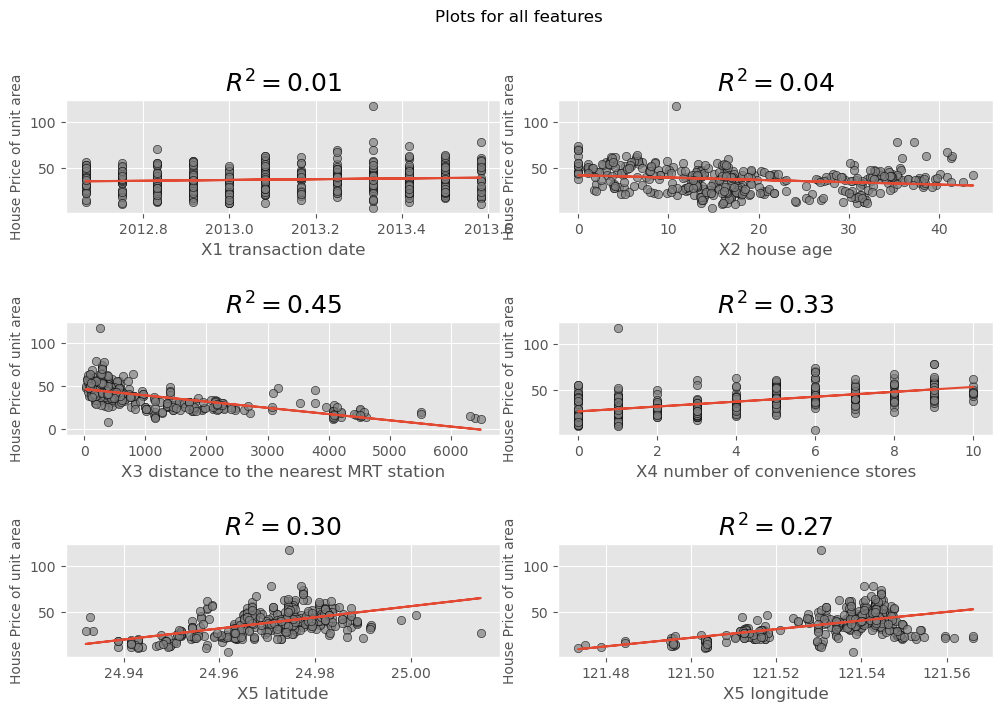

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

figure, axis = plt.subplots(3, 2 ,figsize=(10,7))
figure.tight_layout(h_pad=7)

X1 = df['X1 transaction date'].values.reshape(-1,1)
X2 = df['X2 house age'].values.reshape(-1,1)
X3 = df['X3 distance to the nearest MRT station'].values.reshape(-1,1) 
X4 = df['X4 number of convenience stores'].values.reshape(-1,1)
X5 = df['X5 latitude'].values.reshape(-1,1)
X6 = df['X6 longitude'].values.reshape(-1,1)
Y = df['Y house price of unit area'].values


X1_ols = linear_model.LinearRegression()
X2_ols = linear_model.LinearRegression()
X3_ols = linear_model.LinearRegression()
X4_ols = linear_model.LinearRegression()
X5_ols = linear_model.LinearRegression()
X6_ols = linear_model.LinearRegression()

X1_model = X1_ols.fit(X1, Y)
X1_response = X1_model.predict(X1)

X2_model = X2_ols.fit(X2, Y)
X2_response = X2_model.predict(X2)

X3_model = X3_ols.fit(X3, Y)
X3_response = X3_model.predict(X3)

X4_model = X4_ols.fit(X4, Y)
X4_response = X4_model.predict(X4)

X5_model = X5_ols.fit(X5, Y)
X5_response = X5_model.predict(X5)

X6_model = X6_ols.fit(X6, Y)
X6_response = X6_model.predict(X6)

X1_r2 = X1_model.score(X1, Y)
X2_r2 = X2_model.score(X2, Y)
X3_r2 = X3_model.score(X3, Y)
X4_r2 = X4_model.score(X4, Y)
X5_r2 = X5_model.score(X5, Y)
X6_r2 = X6_model.score(X6, Y)


plt.style.use('default')
plt.style.use('ggplot')

axis[0, 0].plot(X1, X1_response)
axis[0, 0].scatter(X1, Y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
axis[0, 0].set_ylabel('House Price of unit area', fontsize=10)
axis[0, 0].set_xlabel('X1 transaction date', fontsize=12)
axis[0, 0].set_title('$R^2= %.2f$' % X1_r2, fontsize=18)

axis[0, 1].plot(X2, X2_response)
axis[0, 1].scatter(X2, Y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
axis[0, 1].set_ylabel('House Price of unit area', fontsize=10)
axis[0, 1].set_xlabel('X2 house age', fontsize=12)
axis[0, 1].set_title('$R^2= %.2f$' % X2_r2, fontsize=18)

axis[1, 0].plot(X3, X3_response)
axis[1, 0].scatter(X3, Y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
axis[1, 0].set_ylabel('House Price of unit area', fontsize=10)
axis[1, 0].set_xlabel('X3 distance to the nearest MRT station', fontsize=12)
axis[1, 0].set_title('$R^2= %.2f$' % X3_r2, fontsize=18)

axis[1, 1].plot(X4, X4_response)
axis[1, 1].scatter(X4, Y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
axis[1, 1].set_ylabel('House Price of unit area', fontsize=10)
axis[1, 1].set_xlabel('X4 number of convenience stores', fontsize=12)
axis[1, 1].set_title('$R^2= %.2f$' % X4_r2, fontsize=18)

axis[2, 0].plot(X5, X5_response)
axis[2, 0].scatter(X5, Y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
axis[2, 0].set_ylabel('House Price of unit area', fontsize=10)
axis[2, 0].set_xlabel('X5 latitude', fontsize=12)
axis[2, 0].set_title('$R^2= %.2f$' % X5_r2, fontsize=18)

axis[2, 1].plot(X6, X6_response)
axis[2, 1].scatter(X6, Y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
axis[2, 1].set_ylabel('House Price of unit area', fontsize=10)
axis[2, 1].set_xlabel('X5 longitude', fontsize=12)
axis[2, 1].set_title('$R^2= %.2f$' % X6_r2, fontsize=18)


figure.suptitle('Plots for all features')
plt.subplots_adjust(top=0.85)

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

######################################## Data preparation #########################################

df = df_orig.copy()
features = ['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude']

X = df[['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude']].values.reshape(-1,len(features))
target = 'Y house price of unit area'
Y = df[target].values
######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

#spliting the data into test and train
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


#fitting simple linear regression to training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

#predicting the test results
y_pred=regressor.predict(X_test)

#Building the optional model using backward elimination


regressor_OLS=sm.OLS(Y,X).fit()
regressor_OLS.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              1351.
Date:                Thu, 10 Mar 2022   Prob (F-statistic):                   1.33e-265
Time:                        20:57:50   Log-Likelihood:                         -1489.3
No. Observations:                 414   AIC:                                      2991.
Df Residuals:                     408   BIC:                                      3015.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.7426      1.416      2.643      0.009       0.959       6.527
x2            -0.2708      0.039     -6.999      0.000      -0.347      -0.195
x3            -0.0055      0.001    -10.122      0.000      -0.007      -0.004
x4             1.1291      0.189      5.975      0.000       0.758       1.501
x5           203.3009     43.523      4.671      0.000     117.744     288.858
x6          -103.4005     23.309     -4.436      0.000    -149.222     -57.579
==============================================================================
Omnibus:                      223.787   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3262.227
Skew:                           1.954   Prob(JB):                         0.00
Kurtosis:                      16.185   Cond. No.                     2.39e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [125]:
x_pred = np.array([2012.917, 32, 84.87882, 10, 24.98298, 121.54024])
x_pred = x_pred.reshape(-1, len(features))
regressor.predict(x_pred)

array([47.12190198])

In [126]:
print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in regressor.coef_])
print('R-squared               :  %.2f' % regressor.score(X, Y))
print('Y-intercept             :  %.2f' % regressor.intercept_)
print('')


Features                :  ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
Regression Coefficients :  [5.02, -0.26, -0.0, 1.09, 225.49, -6.82]
R-squared               :  0.58
Y-intercept             :  -14869.08



In [127]:
#
#
#
#

In [1]:
import pandas as pd
from pandas import read_excel

my_sheet = 'Data' 
file_name = '/home/senior/Downloads/Residential-Building-Data-Set.xlsx'

df_original = read_excel(file_name, sheet_name = my_sheet)

df_original = df_original[1:]
df_original.head(10)

,PROJECT DATES (PERSIAN CALENDAR),Unnamed: 1,Unnamed: 2,Unnamed: 3,PROJECT PHYSICAL AND FINANCIAL VARIABLES,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,OUTPUTS,Unnamed: 108
1,81,1,85,1,1,3150,920,598.5,190,1010.84,...,815.5,1755,8002,60.74,54.26,2978.26,41407,601988,2200,410
2,84,1,89,4,1,7600,1140,3040,400,963.81,...,1316.3,8364.78,8393,90.95,89.79,11379.4,44835,929027,5000,1000
3,78,1,81,4,1,4800,840,480,100,689.84,...,765.8,1755,4930,38.7,32.04,1653.06,37933,377829,1200,170
4,72,2,73,2,1,685,202,13.7,20,459.54,...,152.25,1442.31,1456,9.73,8.34,686.16,8194,122032,165,30
5,87,1,90,2,1,3000,800,1230,410,631.91,...,2244.1,9231.76,9286,136.6,140.2,9821,48260,1.73497e+06,5500,700
6,87,1,90,1,1,2500,640,1050,420,647.32,...,2244.1,9231.76,9286,136.6,140.2,9821,48260,1.73497e+06,5200,700
7,87,2,90,1,1,1810,492,1158.4,640,843.98,...,2526.4,9254.28,9306,136.56,138.8,9291,12393,1.73294e+06,5800,900
8,88,1,89,3,1,1150,380,575,500,590.68,...,3148,9248.4,9380,158.63,169.5,10082,49572,2318397,4600,600
9,76,3,77,4,1,2110,540,189.9,90,732.14,...,550.4,1755,4252,30.13,21.54,2134.49,18409,402158,870,110
10,80,1,80,4,1,3030,930,515.1,170,1007.38,...,764.5,1755,8420,54.62,44.79,2206.19,40234,629797,1700,190


In [ ]:
import seaborn as sns


corrq = df_original.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corrq, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrq, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

fig.suptitle('Correlation matrix of features', fontsize=15)
ax.text(0.77, 0.2, 'wanjohisenior.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)

fig.tight_layout()